In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, Input

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, BatchNormalization

from keras.utils import plot_model
from keras import backend as K
import keras

%matplotlib  inline

#random seed
np.random.seed(42)

2023-08-21 06:24:54.521012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 06:24:55.381492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("Final-revised-data-set.csv")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2008-02-22 0:00,124,7,309,8,6,22,6,2,219,...,0,0,0,0,0,115,0,0,429,-1.0
1,2008-02-22 0:01,264,7,1468,23,6,22,6,10,581,...,0,0,0,0,0,255,0,0,338,-1.0
2,2008-02-22 0:02,94,5,192,16,7,12,7,11,141,...,1,0,0,0,0,93,0,0,247,-1.0
3,2008-02-22 0:03,124,7,434,136,7,16,7,4,234,...,0,0,0,0,1,105,0,0,318,-1.0
4,2008-02-22 0:04,105,6,251,34,6,14,6,16,301,...,0,0,1,0,0,89,0,0,263,-1.0


In [4]:
print("Shape of dataset: ",df.shape)

Shape of dataset:  (7200, 39)


In [5]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38'],
      dtype='object')

In [6]:
df['38'].unique()

array([-1.,  1., nan])

In [7]:
# Remove rows with NaN values
df = df.dropna()
df.shape


(7142, 39)

In [8]:
# after removing nan values
df['38'].unique()

array([-1.,  1.])

In [9]:
df['38'].value_counts()

38
-1.0    6960
 1.0     182
Name: count, dtype: int64

In [10]:
print("length of dataset: ", len(df))

length of dataset:  7142


In [11]:
# checking null values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [12]:
df.dtypes

0      object
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12    float64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31      int64
32      int64
33      int64
34      int64
35      int64
36      int64
37      int64
38    float64
dtype: object

In [13]:
y = df['38'].values
X = df.drop(columns = ["0", "38"]).values

In [14]:
X.shape, y.shape

((7142, 37), (7142,))

In [15]:
# Noramlize X values in the range (0,1)
sc = MinMaxScaler(feature_range = (0, 1))
X_scaled = sc.fit_transform(X)


In [16]:
X_scaled.shape

(7142, 37)

In [17]:
num_classes = len(np.unique(y))
num_classes

2

In [18]:
# Reshape the data for LSTM (samples, timesteps, features)
sequence_length = 10  # Number of timesteps
X_seq = np.array([X_scaled[i:i+sequence_length, :] for i in range(len(X_scaled) - sequence_length + 1)])
y_seq = y[sequence_length - 1:]

In [19]:
X_seq.shape, y_seq.shape

((7133, 10, 37), (7133,))

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.15, random_state = 42)

In [21]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train:  (6063, 10, 37)
Shape of X_test:  (1070, 10, 37)
Shape of y_train:  (6063,)
Shape of y_test:  (1070,)


In [22]:
# After reshaping
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train:  (6063, 10, 37)
Shape of X_test:  (1070, 10, 37)
Shape of y_train:  (6063,)
Shape of y_test:  (1070,)


In [23]:
# Now we shuffle the training set because we will be using the validation_split option later when training.
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

In [24]:
# Standardize the labels to positive integers. The expected labels will then be 0 and 1.
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0


In [25]:
X_train.shape[1:], X_train.shape[2]

((10, 37), 37)

In [26]:
input_shape = X_train.shape[1:]
input_shape

(10, 37)

2023-08-21 06:24:56.919826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-21 06:24:56.982333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-21 06:24:56.982651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

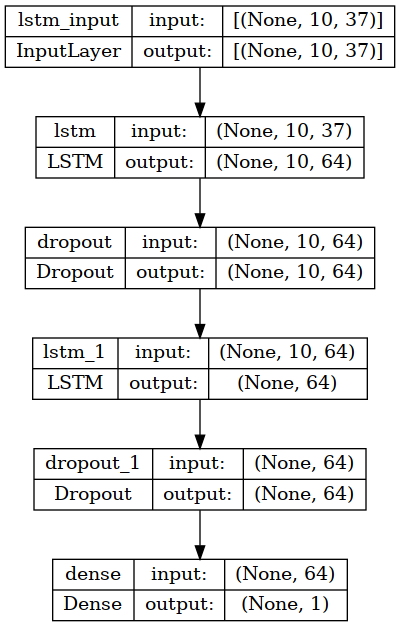

In [27]:
# Create an LSTM model with two hidden layers and dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout for the first LSTM layer
model.add(LSTM(64))
model.add(Dropout(0.2))  # Dropout for the second LSTM layer

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model, to_file="LSTM_model_3.png", show_shapes=True)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            26112     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 59,201
Trainable params: 59,201
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [29]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_500_epoches.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss = 'mean_squared_error', 
    metrics = ["accuracy"],
)
history1 = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
#     callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


2023-08-21 06:24:58.775458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-21 06:24:58.781202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-21 06:24:58.783118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

152/152 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9738

2023-08-21 06:25:04.504671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-21 06:25:04.506179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-21 06:25:04.507967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

152/152 [==============================] - 7s 19ms/step - loss: 0.0327 - accuracy: 0.9738 - val_loss: 0.0270 - val_accuracy: 0.9728
Epoch 2/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0239 - accuracy: 0.9757 - val_loss: 0.0265 - val_accuracy: 0.9728
Epoch 3/500
152/152 [==============================] - 2s 16ms/step - loss: 0.0237 - accuracy: 0.9757 - val_loss: 0.0262 - val_accuracy: 0.9728
Epoch 4/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0236 - accuracy: 0.9757 - val_loss: 0.0259 - val_accuracy: 0.9728
Epoch 5/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0232 - accuracy: 0.9757 - val_loss: 0.0246 - val_accuracy: 0.9728
Epoch 6/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0229 - accuracy: 0.9757 - val_loss: 0.0244 - val_accuracy: 0.9736
Epoch 7/500
152/152 [==============================] - 2s 14ms/step - loss: 0.0223 - accuracy: 0.9763 - val_loss: 0.0247 - val_accuracy: 0.9728
Epoc

Epoch 113/500
152/152 [==============================] - 2s 14ms/step - loss: 6.2997e-04 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 0.9934
Epoch 114/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2707e-04 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 0.9934
Epoch 115/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2333e-04 - accuracy: 0.9994 - val_loss: 0.0061 - val_accuracy: 0.9934
Epoch 116/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2084e-04 - accuracy: 0.9994 - val_loss: 0.0061 - val_accuracy: 0.9934
Epoch 117/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2061e-04 - accuracy: 0.9994 - val_loss: 0.0061 - val_accuracy: 0.9934
Epoch 118/500
152/152 [==============================] - 2s 14ms/step - loss: 6.2288e-04 - accuracy: 0.9994 - val_loss: 0.0065 - val_accuracy: 0.9934
Epoch 119/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2005e-04 - accuracy:

Epoch 222/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0030 - accuracy: 0.9971 - val_loss: 0.0204 - val_accuracy: 0.9794
Epoch 223/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0086 - accuracy: 0.9907 - val_loss: 0.0106 - val_accuracy: 0.9876
Epoch 224/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0023 - accuracy: 0.9973 - val_loss: 0.0071 - val_accuracy: 0.9926
Epoch 225/500
152/152 [==============================] - 2s 15ms/step - loss: 0.0012 - accuracy: 0.9984 - val_loss: 0.0065 - val_accuracy: 0.9926
Epoch 226/500
152/152 [==============================] - 2s 15ms/step - loss: 7.0084e-04 - accuracy: 0.9992 - val_loss: 0.0061 - val_accuracy: 0.9934
Epoch 227/500
152/152 [==============================] - 2s 14ms/step - loss: 6.2989e-04 - accuracy: 0.9994 - val_loss: 0.0060 - val_accuracy: 0.9934
Epoch 228/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2896e-04 - accuracy: 0.9994 - val_lo

Epoch 277/500
152/152 [==============================] - 2s 14ms/step - loss: 6.1911e-04 - accuracy: 0.9994 - val_loss: 0.0057 - val_accuracy: 0.9942
Epoch 278/500
152/152 [==============================] - 2s 14ms/step - loss: 6.2112e-04 - accuracy: 0.9994 - val_loss: 0.0057 - val_accuracy: 0.9942
Epoch 279/500
152/152 [==============================] - 2s 14ms/step - loss: 6.1994e-04 - accuracy: 0.9994 - val_loss: 0.0058 - val_accuracy: 0.9942
Epoch 280/500
152/152 [==============================] - 2s 14ms/step - loss: 6.1900e-04 - accuracy: 0.9994 - val_loss: 0.0058 - val_accuracy: 0.9942
Epoch 281/500
152/152 [==============================] - 2s 14ms/step - loss: 6.1888e-04 - accuracy: 0.9994 - val_loss: 0.0058 - val_accuracy: 0.9942
Epoch 282/500
152/152 [==============================] - 2s 14ms/step - loss: 6.1936e-04 - accuracy: 0.9994 - val_loss: 0.0058 - val_accuracy: 0.9942
Epoch 283/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1876e-04 - accuracy:

Epoch 332/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1930e-04 - accuracy: 0.9994 - val_loss: 0.0070 - val_accuracy: 0.9926
Epoch 333/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1938e-04 - accuracy: 0.9994 - val_loss: 0.0070 - val_accuracy: 0.9926
Epoch 334/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1977e-04 - accuracy: 0.9994 - val_loss: 0.0070 - val_accuracy: 0.9926
Epoch 335/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1960e-04 - accuracy: 0.9994 - val_loss: 0.0070 - val_accuracy: 0.9926
Epoch 336/500
152/152 [==============================] - 2s 15ms/step - loss: 6.3122e-04 - accuracy: 0.9994 - val_loss: 0.0068 - val_accuracy: 0.9926
Epoch 337/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2057e-04 - accuracy: 0.9994 - val_loss: 0.0069 - val_accuracy: 0.9926
Epoch 338/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2045e-04 - accuracy:

Epoch 441/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1884e-04 - accuracy: 0.9994 - val_loss: 0.0074 - val_accuracy: 0.9918
Epoch 442/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1860e-04 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 0.9918
Epoch 443/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1873e-04 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 0.9926
Epoch 444/500
152/152 [==============================] - 2s 15ms/step - loss: 6.1874e-04 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 0.9926
Epoch 445/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2472e-04 - accuracy: 0.9994 - val_loss: 0.0075 - val_accuracy: 0.9926
Epoch 446/500
152/152 [==============================] - 2s 15ms/step - loss: 6.2093e-04 - accuracy: 0.9994 - val_loss: 0.0073 - val_accuracy: 0.9926
Epoch 447/500
152/152 [==============================] - 2s 14ms/step - loss: 6.1867e-04 - accuracy:

In [73]:
def plot_train_validation_graph(history, file_name):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs_range = range(len(loss))  
    

    plt.figure(figsize=(8, 6), dpi=100)
    
    plt.subplot(2, 1, 1)

    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
   
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)      
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Training Vs Validation Loss')   
    plt.tight_layout(pad=1.0)
    plt.grid(True)
    plt.legend()
    
    plt.savefig(file_name + ".png")
    plt.show()

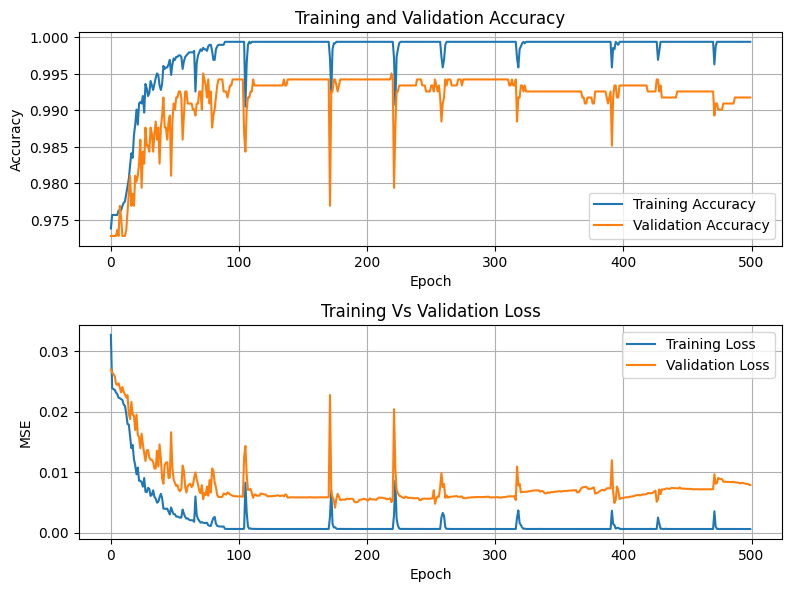

In [74]:
plot_train_validation_graph(history1, "Training_Vs_Validation loss graph LSTM_4 500 epochs")

In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

34/34 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9925
Test accuracy: 0.9925


In [33]:
y_prediction = model.predict(X_test)

2023-08-21 06:43:49.060536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-21 06:43:49.062424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-21 06:43:49.064357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/34 [==============================] - 1s 5ms/step


In [54]:
y_prediction.shape, y_test.shape

((1070, 1), (1070,))

In [55]:
y_predict = y_prediction.flatten()
y_predict.shape

(1070,)

In [56]:
y_predict = list(np.where(np.array(y_predict) > 0.5, 1, 0 ))
y_predict = np.array(y_predict)

In [57]:
y_predict.shape

(1070,)

In [58]:
dataframe = pd.DataFrame({
    "Actual_Load":y_test,
    "Predicted_Load":y_predict
})

In [59]:
dataframe

,Actual_Load,Predicted_Load
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
1065,0.0,0
1066,0.0,0
1067,0.0,0
1068,0.0,0


In [60]:
dataframe["Actual_Load"].value_counts()

Actual_Load
0.0    1039
1.0      31
Name: count, dtype: int64

In [61]:
dataframe["Predicted_Load"].value_counts()

Predicted_Load
0    1047
1      23
Name: count, dtype: int64

In [62]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 0.007476635514018692
Root Mean Squared Error: 0.08646754023342339
Mean Absolute Error: 0.007476635514018692
R-squared Score: 0.7342357726101401


# Confustion Matrix

In [63]:
def display_evaluation(yt, yp):
    TN, FP, FN, TP = confusion_matrix(yt, yp).ravel()

    print("Model: ", model)

    print("Confusion Matix Values:")
    print("TN: ", TN)
    print("FP: ", FP)
    print("FN: ", FN)
    print("TP: ", TP)

    SE = TP/(TP+FN)  #sensitivity, recall, hit rate, or true positive rate (TPR)
    SP = TN/(TN+FP)  #specificity, selectivity or true negative rate (TNR)
    AC = (TP+TN)/(TP+TN+FP+FN)   #accuracy
    PR = TP/(TP+FP)   #precision, positive predictive value (PPV)
    BCR = 1/2*(SE+SP)   #balanced classification rate
    BER = 1-BCR   #balanced error rate
    F1 = 2*PR*SE/(PR+SE)   #F1 score
    FNR = 1-SE   #miss rate or false negative rate (FNR)
    FPR = 1-SP   #fall-out or false positive rate (FPR)
    TS = TP/(TP+FP+FN)   #Threat score (TS) or Critical Success Index (CSI)
    DC = 2*TP/(2*TP+FP+FN) #Dice Coefficient

    print("\nEvaluation Parameters:")
    print('Accuracy:{:.4f}'.format(AC))
    print('Sensitivity:{:.4f}'.format(SE))
    print('Specificity: {:.4f}'.format(SP))
    print('Precision: {:.4f}'.format(PR))
    print('F1 Score: {:.4f}'.format(F1))
    print('BCR: {:.4f}'.format(BCR))
    print('BER: {:.4f}'.format(BER))

In [64]:
display_evaluation(y_test, y_predict)

Model:  <keras.engine.sequential.Sequential object at 0x7f602cce20d0>
Confusion Matix Values:
TN:  1039
FP:  0
FN:  8
TP:  23

Evaluation Parameters:
Accuracy:0.9925
Sensitivity:0.7419
Specificity: 1.0000
Precision: 1.0000
F1 Score: 0.8519
BCR: 0.8710
BER: 0.1290


# ROC Curve

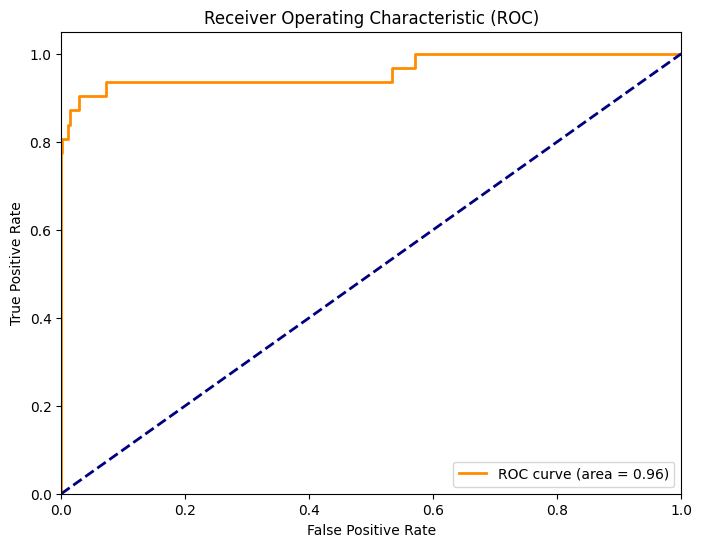

In [65]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6), dpi = 100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig("ROC_LSTM__4_500_epoches.png")
plt.show()

In [46]:
# Print classification report
print(classification_report(y_test, y_predict, target_names=['normal', 'anomaly']))

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      1039
     anomaly       1.00      0.74      0.85        31

    accuracy                           0.99      1070
   macro avg       1.00      0.87      0.92      1070
weighted avg       0.99      0.99      0.99      1070



# Confustion matrix

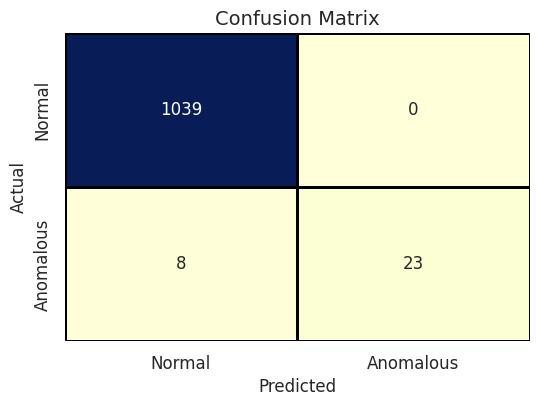

In [85]:
import seaborn as sns

# Define class labels
class_labels = ['Normal', 'Anomalous']

conf_matrix = confusion_matrix(y_test, y_predict)


# Set up a white grid with white text
sns.set(style="white")
plt.figure(figsize=(6, 4), dpi=100)

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            annot_kws={"fontsize": 12}, linewidths=1, linecolor='black')

# Set custom tick labels for x-axis and y-axis
tick_labels = class_labels
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels, fontsize=12)
plt.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels, fontsize=12)

# Add labels and title with increased font size
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Set tick labels' font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("Confusion_matrix_500_epoches.png")

plt.show()
